In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import scipy.stats as stats
import datetime
from scipy.stats import zscore

In [2]:
data=pd.read_csv("C:/Users/Prithvi Shetty/Downloads/Google App Project/Project Final/archive/Google-Playstore.csv")

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,Currency,Size,Minimum Android,Developer Id,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice
0,HTTrack Website Copier,com.httrack.android,Communication,3.6,2848.0,"100,000+",100000.0,351560,True,0.0,USD,2.7M,2.3 and up,Xavier Roche,http://www.httrack.com/,roche+android@httrack.com,"Aug 12, 2013","May 20, 2017",Everyone,http://android.httrack.com/privacy-policy.html,False,False,False
1,World War 2: Offline Strategy,com.skizze.wwii,Strategy,4.3,17297.0,"1,000,000+",1000000.0,2161778,True,0.0,USD,86M,5.1 and up,Skizze Games,http://stereo7.com/,Skizze.Games@gmail.com,"Jul 19, 2018","Nov 26, 2020",Everyone 10+,https://www.iubenda.com/privacy-policy/8032781,True,True,False
2,WPSApp,com.themausoft.wpsapp,Tools,4.2,488639.0,"50,000,000+",50000000.0,79304739,True,0.0,USD,5.8M,4.1 and up,TheMauSoft,http://www.themausoft.com,wpsapp.app@gmail.com,"Mar 7, 2016","Oct 21, 2020",Everyone,https://sites.google.com/view/wpsapppolicy/main,True,False,False
3,"OfficeSuite - Office, PDF, Word, Excel, PowerP...",com.mobisystems.office,Business,4.2,1224420.0,"100,000,000+",100000000.0,163660067,True,0.0,USD,59M,4.4 and up,MobiSystems,http://www.mobisystems.com,support-officesuite-android@mobisystems.com,"Dec 22, 2011","Nov 23, 2020",Everyone,http://www.mobisystems.com/mobile/privacy-poli...,True,True,False
4,Loud Player Free,com.arthelion.loudplayer,Music & Audio,4.2,665.0,"50,000+",50000.0,73463,True,0.0,USD,29M,5.0 and up,Arthelion92,http://www.arthelion.com,arthelion92@gmail.com,"Sep 24, 2016","Nov 22, 2020",Everyone,http://www.arthelion.com/index.php/fr/android-...,False,False,False


In [4]:
# Data Dropping 

data.drop([ 'App Id', 'Developer Website','Developer Email','Privacy Policy'],axis=1, inplace=True)

In [5]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1118136 entries, 0 to 1118135
Data columns (total 19 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   App Name          1118135 non-null  object 
 1   Category          1118133 non-null  object 
 2   Rating            1111286 non-null  float64
 3   Rating Count      1111286 non-null  float64
 4   Installs          1117975 non-null  object 
 5   Minimum Installs  1117975 non-null  float64
 6   Maximum Installs  1118136 non-null  int64  
 7   Free              1118136 non-null  bool   
 8   Price             1118136 non-null  float64
 9   Currency          1117975 non-null  object 
 10  Size              1118136 non-null  object 
 11  Minimum Android   1116123 non-null  object 
 12  Developer Id      1118134 non-null  object 
 13  Released          1110406 non-null  object 
 14  Last Updated      1118136 non-null  object 
 15  Content Rating    1118136 non-null  object 
 16  

In [6]:
# Getting Duplicates
#out of 1118135 remaining left over after deleting duplicates 
#data['App Name']=data['App Name'].duplicated()
#data['App Name'].value_counts()
data.sort_values("App Name", inplace = True) 
data.drop_duplicates(subset ="App Name", keep = False, inplace = True)

In [7]:
#from scipy import stats
#z=np.abs(stats.zscore(data))
#print(z)

In [8]:
## Filling missing values with mode
data["Released"].fillna(value="Oct 13, 2020", inplace=True)
data["Minimum Android"].fillna(value="4.1 and up", inplace= True)

In [9]:
# Conversion of date
data["Released"]= pd.to_datetime(data['Released'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')
data["Last Updated"]= pd.to_datetime(data['Last Updated'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')

In [10]:
data["Last Updated"]= pd.to_datetime(data['Last Updated'], format='%b %d, %Y',
                                 infer_datetime_format=True, errors='coerce')

In [11]:
# Removing of special charaters in size and converting to float
data['Size']= pd.to_numeric(data['Size'].str.replace(r'[a-zA-Z]+', ''), 
                             errors='coerce')
#data['Minimum Android']= pd.to_numeric(data['Minimum Android'].str.replace(r'[a-zA-Z]+', ''), 
                           #  errors='coerce')

In [12]:
# Finding Tenurity and Maintainance in terms of days
data['Tenurity']= (datetime.datetime(2021, 1, 31) - data['Released']).dt.days
data['Maintaninance']= (datetime.datetime(2021, 1, 31) - data['Last Updated']).dt.days

In [13]:
# Removing Special Characters in installs and converting to float
data["Installs"]=data["Installs"].str.replace("+","")
data["Installs"]=data["Installs"].str.replace(",","")
data["Installs"]= pd.to_numeric(data["Installs"].astype(float))

In [14]:
# 93.59% of the apps in the dataset are available to the users for free and 
# some are only paid hence this will effect the model hence we are removing and refereening to the free column to segregate free#

#Paid apps
data['Price'].value_counts(normalize=True)

0.00     9.559046e-01
0.99     1.324780e-02
1.99     5.584836e-03
1.49     4.115715e-03
2.99     3.742997e-03
             ...     
15.64    9.886415e-07
53.81    9.886415e-07
30.95    9.886415e-07
44.77    9.886415e-07
6.01     9.886415e-07
Name: Price, Length: 694, dtype: float64

In [15]:
data.drop(['Price'], inplace=True, axis =1)

In [16]:
# Mising Value Treatment
data.isnull().sum()

App Name                1
Category                3
Rating               6533
Rating Count         6533
Installs              159
Minimum Installs      159
Maximum Installs        0
Free                    0
Currency              159
Size                35537
Minimum Android         0
Developer Id            2
Released                0
Last Updated            0
Content Rating          0
Ad Supported            0
In App Purchases        0
Editors Choice          0
Tenurity                0
Maintaninance           0
dtype: int64

In [17]:
data['App Name'].dropna(inplace=True, axis=0)
data["Rating"].fillna(data['Rating'].mean(), inplace=True)
data["Rating Count"].fillna(data['Rating Count'].median(), inplace=True)
data["Minimum Installs"].fillna(data['Minimum Installs'].median(), inplace=True)
data["Installs"].fillna(data['Installs'].median(), inplace=True)
data["Currency"].fillna(value="USD", inplace= True)
data["Category"].fillna(value="Education", inplace= True)
data["Size"].fillna(data["Size"].median(), inplace= True)
#data["App Name"].fillna(value="Tic Tac Toe",inplace= True)
data["Developer Id"].fillna(value="Subsplash Inc",inplace=True)
#data["Developer Website"].fillna(value="http://www.subsplash.com/", inplace=True)
#data["Developer Email"].fillna(value="support@classplus.co", inplace=True)
data["Released"].fillna(value="Oct 13, 2020", inplace=True)
#data["Privacy Policy"].fillna(value="http://www.cmcm.com/protocol/launcher-theme/privacy.html", inplace=True)
#data["Developer Website"].fillna(value="http://www.subsplash.com/", inplace=True)

In [18]:
# Data Dropping 

data.drop([ 'Last Updated', 'Released'],axis=1, inplace=True)

In [19]:
data.head()

,App Name,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Currency,Size,Minimum Android,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Tenurity,Maintaninance
427568,!OS-13 EMUI 5/8 Theme,Personalization,3.8,63.0,10000.0,10000.0,26968,True,USD,27.0,4.4 and up,EMUI THEMES,Everyone,True,False,False,591,491
427456,!OS-14 Dark UI EMUI 10/9/9.1/5/8 Theme,Personalization,4.2,473.0,100000.0,100000.0,123803,True,USD,48.0,4.4 and up,EMUI THEMES,Everyone,True,False,False,455,168
427574,!OS-14 EMUI 10/9.1/9/8/5 Theme,Personalization,3.8,155.0,50000.0,50000.0,68500,True,USD,32.0,4.4 and up,EMUI THEMES,Everyone,True,False,False,582,163
114271,!nShelf,Business,4.4,8.0,1000.0,1000.0,1617,True,USD,9.8,5.0 and up,NESTLÉ,Everyone,False,False,False,478,136
540146,!أوجد الكلمة,Word,4.1,7.0,100.0,100.0,446,True,USD,4.0,4.4 and up,MKM soft,Everyone,True,False,False,320,295


In [20]:
#descriptive statistics
data.describe()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Size,Tenurity,Maintaninance
count,1.011489e+06,1.011489e+06,1.011489e+06,1.011489e+06,1.011489e+06,1.011489e+06,1.011489e+06,1.011489e+06
mean,2.478877e+00,5.270045e+03,3.150887e+05,3.150887e+05,5.443725e+05,2.629851e+01,1.001060e+03,5.284587e+02
std,2.047942e+00,2.844346e+05,2.136619e+07,2.136619e+07,3.136869e+07,7.371144e+01,8.009536e+02,5.458622e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.900000e+01,5.900000e+01
25%,0.000000e+00,0.000000e+00,1.000000e+02,1.000000e+02,1.520000e+02,5.200000e+00,3.600000e+02,1.400000e+02
50%,3.500000e+00,1.000000e+01,1.000000e+03,1.000000e+03,1.633000e+03,1.000000e+01,7.840000e+02,3.260000e+02
75%,4.300000e+00,9.500000e+01,1.000000e+04,1.000000e+04,1.807200e+04,2.500000e+01,1.425000e+03,7.190000e+02
max,5.000000e+00,1.253808e+08,1.000000e+10,1.000000e+10,1.077270e+10,9.990000e+02,4.021000e+03,4.484000e+03


In [21]:
# Correlation
data.corr()

,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Size,Ad Supported,In App Purchases,Editors Choice,Tenurity,Maintaninance
Rating,1.000000,0.016377,0.012246,0.012246,0.014470,0.033728,0.030775,0.098252,0.189979,0.024302,0.286970,0.035595
Rating Count,0.016377,1.000000,0.513738,0.513738,0.563005,0.003461,0.004189,0.002690,0.031796,0.150174,0.027738,-0.011308
Installs,0.012246,0.513738,1.000000,1.000000,0.951212,0.003093,0.001127,-0.001077,0.014263,0.056150,0.021884,-0.008868
Minimum Installs,0.012246,0.513738,1.000000,1.000000,0.951212,0.003093,0.001127,-0.001077,0.014263,0.056150,0.021884,-0.008868
Maximum Installs,0.014470,0.563005,0.951212,0.951212,1.000000,0.003632,0.001310,-0.000952,0.017452,0.067779,0.025279,-0.010354
Free,0.033728,0.003461,0.003093,0.003093,0.003632,1.000000,-0.091108,0.249170,0.032445,-0.000093,-0.172921,-0.170861
Size,0.030775,0.004189,0.001127,0.001127,0.001310,-0.091108,1.000000,-0.098018,0.034221,0.012915,0.126558,0.171884
Ad Supported,0.098252,0.002690,-0.001077,-0.001077,-0.000952,0.249170,-0.098018,1.000000,0.094609,0.001264,-0.140991,-0.088503
In App Purchases,0.189979,0.031796,0.014263,0.014263,0.017452,0.032445,0.034221,0.094609,1.000000,0.058285,0.079778,-0.066480
Editors Choice,0.024302,0.150174,0.056150,0.056150,0.067779,-0.000093,0.012915,0.001264,0.058285,1.000000,0.023080,-0.019377


In [22]:
# Heat Map
a=data.corr()
#sns.heatmap(a)

In [23]:
#sns.pairplot(a)

In [24]:
# Feature Enginerring 
# As the correlation between Installs and Minimum Installs are high we will be dropping Minimum installs column
data.drop(['Minimum Installs'], inplace=True, axis=1)

In [25]:
data.head()

,App Name,Category,Rating,Rating Count,Installs,Maximum Installs,Free,Currency,Size,Minimum Android,Developer Id,Content Rating,Ad Supported,In App Purchases,Editors Choice,Tenurity,Maintaninance
427568,!OS-13 EMUI 5/8 Theme,Personalization,3.8,63.0,10000.0,26968,True,USD,27.0,4.4 and up,EMUI THEMES,Everyone,True,False,False,591,491
427456,!OS-14 Dark UI EMUI 10/9/9.1/5/8 Theme,Personalization,4.2,473.0,100000.0,123803,True,USD,48.0,4.4 and up,EMUI THEMES,Everyone,True,False,False,455,168
427574,!OS-14 EMUI 10/9.1/9/8/5 Theme,Personalization,3.8,155.0,50000.0,68500,True,USD,32.0,4.4 and up,EMUI THEMES,Everyone,True,False,False,582,163
114271,!nShelf,Business,4.4,8.0,1000.0,1617,True,USD,9.8,5.0 and up,NESTLÉ,Everyone,False,False,False,478,136
540146,!أوجد الكلمة,Word,4.1,7.0,100.0,446,True,USD,4.0,4.4 and up,MKM soft,Everyone,True,False,False,320,295


In [26]:
# Outlier Detection using plots

def plotvariable(data, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(data[variable],alpha =0.5)
    
    plt.subplot(1,2,2)
    sns.boxplot(data[variable])
    plt.show()

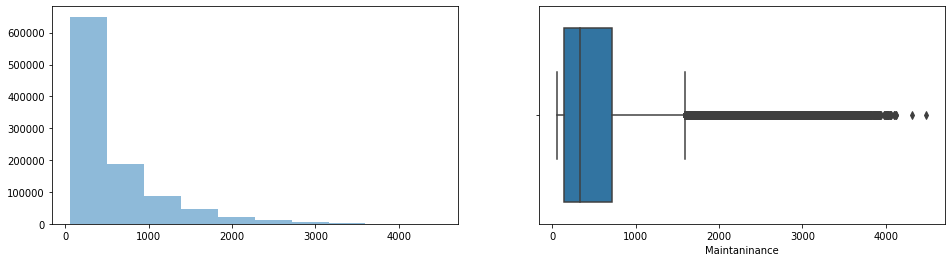

In [27]:
plotvariable(data, 'Maintaninance')

In [28]:
def find_boundrs(data,variable):
    q1 = data[variable].quantile(.25)
    q3 = data[variable].quantile(.75)
    iqr = q3-q1
    lowr_bondry = q1 - 1.5 * iqr
    upr_bondry = q3 + 1.5 * iqr
    
    return lowr_bondry , upr_bondry

In [29]:
lowr_rating , upr_rating = find_boundrs(data,'Rating Count')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)


data['Rating Count'] = np.where(data['Rating Count'] > upr_rating,upr_rating, 
                           np.where(data['Rating Count'] < lowr_rating, lowr_rating, data['Rating Count']))

Lower Limit :  -142.5
Upper Limit :  237.5


In [30]:
lowr_rating , upr_rating = find_boundrs(data,'Rating Count')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)


data['Rating Count'] = np.where(data['Rating Count'] > upr_rating,upr_rating, 
                           np.where(data['Rating Count'] < lowr_rating, lowr_rating, data['Rating Count']))

Lower Limit :  -142.5
Upper Limit :  237.5


In [ ]:
data.columns

In [ ]:
#plotvariable(data, 'Maintaninance')

In [31]:
lowr_rating , upr_rating = find_boundrs(data,'Rating')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Rating'] = np.where(data['Rating'] > upr_rating,upr_rating, 
                           np.where(data['Rating'] < lowr_rating, lowr_rating, data['Rating']))

Lower Limit :  -6.449999999999999
Upper Limit :  10.75


In [32]:
lowr_rating , upr_rating = find_boundrs(data,'Installs')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Installs'] = np.where(data['Installs'] > upr_rating,upr_rating, 
                           np.where(data['Installs'] < lowr_rating, lowr_rating, data['Installs']))

Lower Limit :  -14750.0
Upper Limit :  24850.0


In [33]:
lowr_rating , upr_rating = find_boundrs(data,'Maximum Installs')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Maximum Installs'] = np.where(data['Maximum Installs'] > upr_rating,upr_rating, 
                           np.where(data['Maximum Installs'] < lowr_rating, lowr_rating, data['Maximum Installs']))

Lower Limit :  -26728.0
Upper Limit :  44952.0


In [34]:
lowr_rating , upr_rating = find_boundrs(data,'Size')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Size'] = np.where(data['Size'] > upr_rating,upr_rating, 
                           np.where(data['Size'] < lowr_rating, lowr_rating, data['Size']))

Lower Limit :  -24.500000000000004
Upper Limit :  54.7


In [35]:
lowr_rating , upr_rating = find_boundrs(data,'Tenurity')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Tenurity'] = np.where(data['Tenurity'] > upr_rating,upr_rating, 
                           np.where(data['Tenurity'] < lowr_rating, lowr_rating, data['Tenurity']))

Lower Limit :  -1237.5
Upper Limit :  3022.5


In [36]:
lowr_rating , upr_rating = find_boundrs(data,'Maintaninance')
print('Lower Limit : ',lowr_rating)
print('Upper Limit : ',upr_rating)
data['Maintaninance'] = np.where(data['Maintaninance'] > upr_rating,upr_rating, 
                           np.where(data['Maintaninance'] < lowr_rating, lowr_rating, data['Maintaninance']))

Lower Limit :  -728.5
Upper Limit :  1587.5


In [37]:
b=data.corr()

In [38]:
#sns.pairplot(b)

In [39]:
#data transformation
data2=data
data2.columns
data2.drop(['Developer Id'], inplace=True, axis=1)
#data2.drop(['App Name'], inplace=True, axis=1)

In [ ]:
# Normalization

norm=  data2.select_dtypes(include=['float64']).copy()

In [ ]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler() 
minmax_df = scaler.fit_transform(norm) 
minmax_df = pd.DataFrame(minmax_df) 

In [ ]:
num_final= minmax_df.rename(columns={0 : 'Rating', 1 : 'Rating Count', 2 : 'Installs', 3: 'Maximum Installs',4:'Size',5:'Tenurity',6:'Maintainance'})

In [ ]:
num_final.shape

In [ ]:
from sklearn.preprocessing import LabelEncoder

l_encoder=  data2.select_dtypes(include=['bool','object']).copy()
label_encoder= LabelEncoder()
coded_data= label_encoder.fit_transform(l_encoder['Free'])
coded_data2= label_encoder.fit_transform(l_encoder['Ad Supported'])
coded_data3= label_encoder.fit_transform(l_encoder['In App Purchases'])
coded_data4= label_encoder.fit_transform(l_encoder['Editors Choice'])
otp= pd.DataFrame(coded_data)
otp2= pd.DataFrame(coded_data2)
otp3= pd.DataFrame(coded_data3)
otp4= pd.DataFrame(coded_data4)
final = pd.concat([otp,otp2, otp3, otp4], ignore_index=True,axis=1)
result= final.rename(columns={0 : 'Free', 1 : 'Ad Supported', 2 : 'In App Purchases', 3: 'Editors Choice'})

In [ ]:
result.head()

In [ ]:

# Category variable one hot encoding 

from sklearn.preprocessing import OneHotEncoder
dummines=data2["Category"].str.get_dummies(" ")
dummines2=data2["Currency"].str.get_dummies(" ")

#encoder = OneHotEncoder(sparse= False,handle_unknown='error',drop='first' )


In [ ]:
dummines

In [ ]:
final2 = pd.concat([dummines,dummines2], ignore_index=True,axis=1)
result2= final2.rename(columns={0:'Others', 1:'Action',2:'Adventure',3:'Arcade',4:'Art',5:'Audio',6:'Auto',7:'Beauty',8:'Board',9:'Books',
10:'Business',11:'Card',12:'Casino', 13: 'Casual',14:'Comics',15:'Communication',
16:'Dating',17:'Demo',18:'Design',19:'Drink',20:'Editors',21:'Education',22:'Educational',23:'Entertainment',
24:'Events',25:'Finance',26:'Fitness',27:'Food',28:'Health',29:'Home',30:'House',31:'Libraries',32:'Lifestyle',33:'Local',
34:'Magazines',35:'Maps',36:'Medical',37:'Music',38:'Navigation',39:'News',40:'Parenting',41:
'Personalization',42:'Photography',43:'Players',44:'Playing',45:'Productivity',46:'Puzzle',47:'Racing',48:'Reference',
49:'Role',50:'Shopping',51:'Simulation',52:'Social',53:'Sports',54:'Strategy',55:'Tools',56:'Travel',57:'Trivia',58:
'Vehicles',59:'Video',60:'Weather',61:'Word',62:'AED',63:'AUD',64:'BDT',65:'BGN',66:'BOB',67:'BRL',68:'CAD',69:'CHF',70:'CLP',
                                                71:'COP',72:'CRC',73:'CZK',74:'DKK',75:'DZD',76:'EGP',77:'EUR',
78:'GBP',79:'GHS',80:'HKD',81:'HRK',82:'HUF',83:'IDR',84:'ILS',85:'INR',86:'JPY',87:'KES',88:'KRW',89:'KZT',90:'LBP',91:'LKR,',92:'MXN',93:'MYR',
94:'NGN',95:'NOK',96:'NZD',97:'PEN',98:'PHP',99:'PKR',100:'PLN',101:'RON',102:'RSD',103:'RUB',104:'SAR',105:'SEK',106:'SGD',107:'THB',108:'TRY',109:'TWD',
110:'TZS',111:'UAH',112:'USD',113:'VND',114:'XXX',115:'ZAR'})

In [ ]:
result2.columns

In [ ]:
result2.shape

In [ ]:
f_result= pd.concat([num_final,result,result2], axis=1)

In [ ]:
data.info()

In [ ]:
le= LabelEncoder()


for column in data3.columns:
    if data3[column].dtype == type('float64'):
        data3[column] = le.fit_transform(data3[column])

In [ ]:
data3=data

In [ ]:
data3.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mx=MinMaxScaler()
for column in data3.columns:
    if data3[column].dtype == "float64":
        data3[column] = mx.fit_transform(data3[column])

In [ ]:
data3.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sns

In [ ]:
y = data3['Ad Supported']
x = data3.drop('Ad Supported', axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)


In [ ]:
logmodel=LogisticRegression()

In [ ]:
logmodel.fit(x_train, y_train)

In [ ]:
predictions = logmodel.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
classification_report(y_test,predictions)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,predictions)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,predictions)

In [ ]:
data3.head()

In [ ]:
# Data Transformation of training set only
data3=data
x =data(drop='Ad Supported')
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)


In [ ]:
data3.info()

In [ ]:
for column in data3.columns:
    if data3[column].dtype == 'float64':
        data3[column] = label_encoder.fit_transform(data3[column])

In [ ]:
data3.head()

In [ ]:
#data5=data
#scaler = preprocessing.RobustScaler() 
#robust_df = scaler.fit_transform(x) 
#robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])

In [ ]:
data['Price'].value_counts()

#According to this data set there are 1071494 application those are avaiable for the users for free based on the price column.

In [ ]:
sns.boxplot(data['Price'])

In [ ]:
data.columns

In [ ]:
#data2 = data.drop(['App Name','Category','Free','Currency','Developer Id', 'Content Rating',
      # 'Ad Supported', 'In App Purchases', 'Editors Choice'], axis=1, inplace=True)

In [ ]:
# 

data2= data.select_dtypes(include=['float64','int','int64'])

In [ ]:
data2.head()

In [ ]:
data2.describe()

In [ ]:
data2.corr()

In [ ]:
# Zscore for numercial columns
data2.apply(zscore)

In [ ]:
z= np.abs(stats.zscore(data2))
z 

#Hear the values above 3 are outliers

In [ ]:
threshold = 3
print(np.where(z > 3))

In [ ]:
data2.describe()

In [ ]:
#df= pd.DataFrame(columns=['Rating','Rating Count','Installs','Minimum Installs'
                          #,'Price','Size','Minimum Android','Tenurity','Maintaninance'])

In [ ]:
Q3, Q1 = data['Rating'].quantile((0.10, 0.90))
Q3, Q1

In [ ]:
# as zero is no rating we will change the values as 1 to 5
#df['Rating']= np.where (df['Rating'] >  0.0)
#df['Rating']

In [ ]:
sns.boxplot(data['Rating'])

In [ ]:
Q3 = data['Rating'].quantile(0.75)
Q1 = data['Rating'].quantile(0.25)
IQR = Q3 - Q1


print(IQR)

In [ ]:
data['Rating'] < (Q1 - 1.5 * IQR) or (data['Rating'] > (Q3 + 1.5 *IQR )) 

In [ ]:
data.isna().sum() / len(data) *100 

In [ ]:
sns.boxplot(data['Rating'])

In [ ]:
#data['Rating'].fillna(data['Rating'].mean(), inplace= True)

In [ ]:
data['Category'].value_counts()

In [ ]:
sns.boxplot(data['Rating'])

In [ ]:
heat=data.corr()

In [ ]:
sns.heatmap(heat)

In [ ]:
#data["Size"]=data["Size"].str.replace("M","")
#data["Size"]=data["Size"].str.replace("k","")
#data["Installs"]=data["Installs"].str.replace("+","")
#data["Installs"]=data["Installs"].str.replace(",","")


#data["Installs"]= pd.to_numeric(data["Installs"].astype(float))


In [ ]:
#removing dulicates
#print('Duplicates:\n',data.duplicated().value_counts())

In [ ]:
#data.drop_duplicates(inplace=True)

In [ ]:
def plotvariable(data2, variable):
    plt.figure(figsize=(16,4))
    plt.subplot(1,2,1)
    plt.hist(data2[variable],alpha =0.5)
    
    plt.subplot(1,2,2)
    sns.boxplot(data2[variable])
    plt.show()

In [ ]:

plotvariable(data2, 'Rating Count')

In [ ]:
def find_boundrs(data2,variable):
    q1 = data2[variable].quantile(.05)
    q3 = data2[variable].quantile(.95)
    iqr = q3-q1
    lowr_bondry = q1 - 1.5 * iqr
    upr_bondry = q3 + 1.5 * iqr
    
    return lowr_bondry , upr_bondry

In [ ]:


data2['Rating Count'] = np.where(data['Rating Count'] > upr_rating,upr_rating, 
                           np.where(data['Rating Count'] < lowr_rating, lowr_rating, data['Rating Count']))

In [ ]:
data2['Rating'].shape

In [ ]:
# Outlier Trimming 
 
otlrs= np.where(data['Rating Count'] > upr_rating, True, np.where(data['Rating Count'] < lowr_rating, True, False) )

In [ ]:
otlrs

In [ ]:
new_data = data.iloc[~(otlrs),]

In [ ]:
new_data.shape

In [ ]:
plotvariable(new_data, 'Rating Count')

In [ ]:
#(data.isnull()).sum()

In [ ]:
data['Category'].value_counts()                  

In [ ]:
data.describe()

In [ ]:
# Plot of the ratings
plt.figure(figsize=(8,8))
plt.title('Ratings distribution')
sns.distplot(data['Rating'],kde=True,color='orange',fit=stats.norm)
plt.legend(['Normal Distribution','Ratings',])

In [ ]:
#data.head()

In [ ]:
#plt.hist(data['Installs'].values)
#plt.show()
#data['Installs']

In [ ]:
#sns.boxplot(data['Installs'])

In [ ]:
#data.isnull().sum()
#data.drop(['Developer Website','Developer Email','Privacy Policy'],inplace=True, axis=1)

In [ ]:
#data["Size"]=data["Size"].str.replace("M","")
##data["Size"]=data["Size"].str.replace("Varies with device", "")
#data["Size"] = pd.to_numeric(data["Size"], errors='coerce')

#data=data.replace({"Size":"Varies with device", 'Minimum Android':"Varies with device"}, np.NaN)   



In [ ]:
data.isna().sum()

In [ ]:
data["Minimum Android"].value_counts()

In [ ]:
data["Size"].value_counts()

In [ ]:
data["Minimum Android"] =data["Minimum Android"]

In [ ]:
data["Minimum Android"].value_counts()

In [ ]:
data["Size"].isnull().sum()

In [ ]:
data["Size"].describe()

In [ ]:
#data['Size'].replace(to_replace = "Varies with device", value =-99999) 
data['Size'].value_counts()

In [ ]:
data["Size"].describe()

In [ ]:
data["Size"].value_counts()

In [ ]:
data["Installs"]=data["Installs"].str.replace("+","")
data["Installs"]=data["Installs"].str.replace(",","")

data["Installs"].value_counts()

In [ ]:
data["Rating"].fillna(data['Rating'].median(), inplace=True)
data["Rating Count"].fillna(data['Rating Count'].median(), inplace=True)
data["Minimum Installs"].fillna(data['Minimum Installs'].median(), inplace=True)
data["Installs"].fillna(data['Installs'].median(), inplace=True)
data["Currency"].fillna(value="USD", inplace= True)
data["Category"].fillna(value="Education", inplace= True)

In [ ]:
data["Installs"]=data["Installs"].astype(float)

In [ ]:
data.isnull().sum()

In [ ]:
data.isna().sum()

In [ ]:
data.head()

In [ ]:
data.dtypes

In [ ]:
data.info()

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [ ]:
data.describe()

In [ ]:
data.describe()

In [ ]:
data3=data.corr()

In [ ]:
data3["Price"].sort_values(ascending=False)

In [ ]:
data.isnull().sum()

In [ ]:
data["Ad Supported"].value_counts()

In [ ]:
import datetime

In [ ]:
datetime.date.today()

In [ ]:
data["Released"]=data["Released"]=pd._todatetime
data["Last Updated"]=data["Last Updated"]

In [ ]:
data["Released"]=data["Released"].datetime.date(data["Released"])

In [ ]:
for items in data["Released"]:
    string_date=str(data["Released"])
    format= "%m-%d-%Y"
    datetime_object=datetime.datetime.strptime(string_date,format)

In [ ]:
from scipy import stats

In [ ]:
zscore= np.abs(stats.zscore(data2))

In [ ]:
zscore

In [ ]:
threshold =3
print(np.where(zscore > 3))

In [ ]:
print(zscore[3][3])

In [ ]:
iqr=data2
q1= iqr.quantile(0.25)
q3= iqr.quantile(0.75)
iqr_result= q3-q1
print(iqr_result)

In [ ]:
print(iqr < (q1 -1.5 * iqr_result)) | (iqr > (q3 + 1.5 * iqr_result))

In [ ]:
sns.boxplot(x=data2["Rating"])

In [ ]:
Rating		Installs		Maximum Installs Price

In [ ]:
sns.boxplot(x=data2["Rating Count"])

In [ ]:
sns.boxplot(x=data2["Installs"])

In [ ]:
sns.boxplot(x=data2["Minimum Installs"])

In [ ]:
x= data2["Rating"]
y=data2["Price"]
plt.scatter(x,y, c="red")

plt.show()

In [ ]:
from scipy.stats import skew

In [ ]:
for col in data2:
    print(col)
    print(skew(data2[col]))
    
    plt.figure()
    sns.distplot(data2[col])
    plt.show()

In [ ]:
log_data= np.log10(data2["Maximum Installs"])
log_data.head()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [ ]:
sns.boxplot(x=data2["Maximum Installs"])

In [ ]:
sns.boxplot(x=data2["Price"])

In [ ]:
data2_clean=data2
data2_clean=data2_clean[(zscore < 3).all(axis=1)]

In [ ]:
data2_clean.shape

In [ ]:
data2.shape

In [ ]:
x=data2.drop(["Price"],axis=1).values
y=data2["Price"].values
m=len(x)
labelencd= LabelEncoder()

In [ ]:
#data2['Ad Supported']=labelencd.fit_transform(data2['Ad Supported'])
#data2['In App Purchases']=labelencd.fit_transform(data2['In App Purchases'])
#data2['Editors Choice']=labelencd.fit_transform(data2['Editors Choice'])
#data2['Free']=labelencd.fit_transform(data2['Free'])

#data2.head()

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=1)
print(x_train[:5])

In [ ]:
reg=LinearRegression()
reg=reg.fit(x_train,y_train)

In [ ]:
data.columns

In [ ]:
data2=data.drop(['App Name', 'App Id', 'Category','Currency', 'Size', 'Minimum Android', 'Developer Id', 'Developer Website', 'Developer Email', 'Released', 'Last Updated', 'Content Rating', 'Privacy Policy'],axis=1)

In [ ]:
data2.head()

In [ ]:
print(reg.coef_)

In [ ]:
print(reg.intercept_)

In [ ]:
y_predict=reg.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
rmse= np.sqrt(mean_squared_error(y_test, y_predict))
print(rmse)

In [ ]:
r2=r2_score(y_test,y_predict)

print(r2)